In [4]:
import pandas as pd
# df = pd.read_parquet('./material/snr_point.pq')
version = 'v20250301'
df = pd.read_parquet(f'./metric/pair_predicted_{version}.pq')

import numpy as np
df['lon'] = df['lon_pair'].apply(np.mean)
df['lat'] = df['lat_pair'].apply(np.mean)

### plot spatial distribution

/tmp/ipykernel_107623/1416220424.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


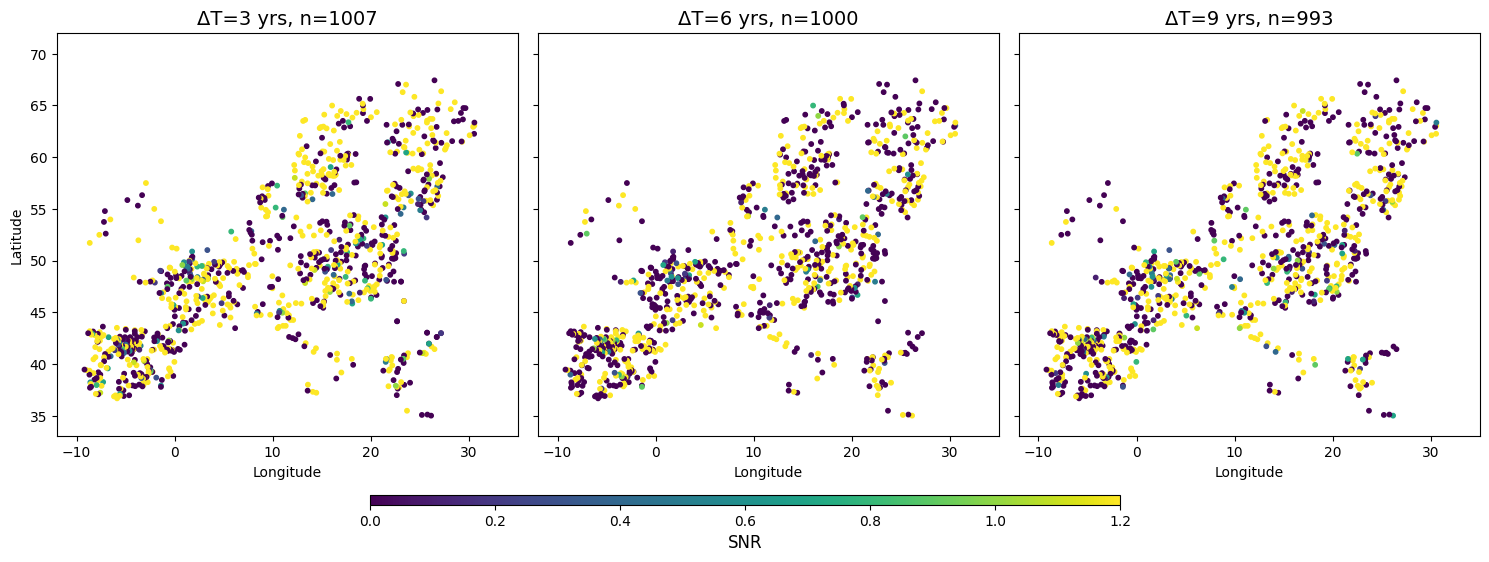

In [8]:
import matplotlib.pyplot as plt

latbox = [33, 72]
lonbox = [-12, 35]

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)

for ax, year in zip(axes, [3, 6, 9]):
    dff = df[df['year_change'] == year]
    sc = ax.scatter(dff['lon'], dff['lat'], s=10, c=dff['soc_change'], vmin=0, vmax=1.2)
    ax.set_title(f'ΔT={year} yrs, n={len(dff)}', fontsize=14)
    ax.set_xlabel('Longitude')
    ax.set_xlim(lonbox)
    ax.set_ylim(latbox)
    # ax.grid(True)

axes[0].set_ylabel('Latitude')

cbar_ax = fig.add_axes([0.25, -0.02, 0.5, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sc, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SNR', fontsize=12)

plt.tight_layout()
plt.show()


### plot temporal difference

In [12]:
df['lc_change'] = df['lc_survey_pair'].apply(lambda x: 0 if len(set(x)) == 1 else 1)
df['signal'] = df['soc_change'].abs()
df['year'] = df['time_pair'].apply(lambda x: f"{x[0]}-{x[1]}")

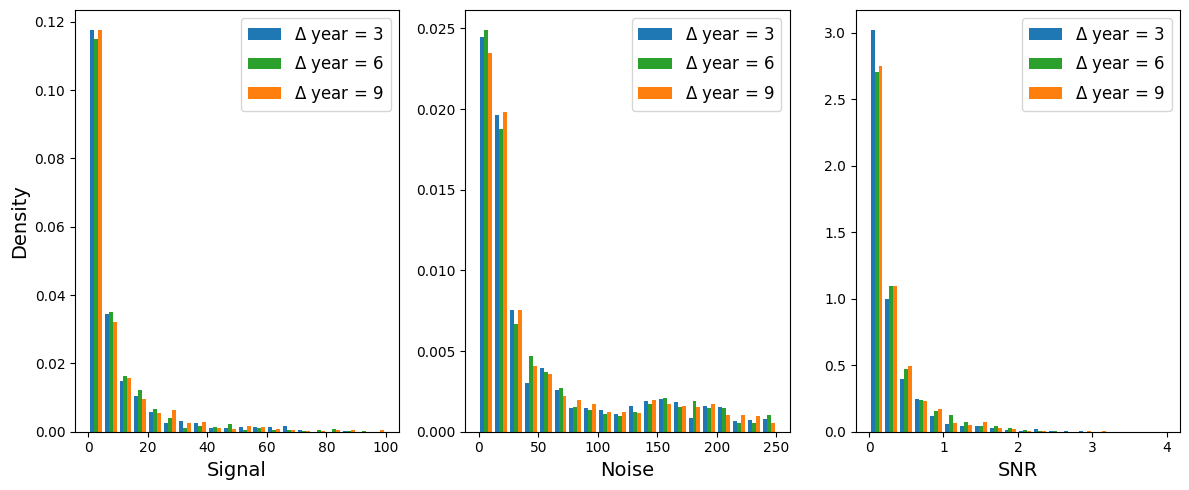

In [62]:
import matplotlib.pyplot as plt

# Define columns and year_change groups
columns = ['signal', 'noise', 'snr']
groups = [3, 6, 9]
colors = ['tab:blue', 'tab:green', 'tab:orange']
n_bins = 20  
ranges = [100, 250, 4]
xlbl = ['Signal', 'Noise', 'SNR']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

for idx, col in enumerate(columns):
    ax = axes[idx]
    
    x_multi = [df[df['year_change'] == g][col].dropna() for g in groups]
    
    ax.hist(x_multi, bins=n_bins, density=True, range=(0, ranges[idx]), histtype='bar', label=[f'$\Delta$ year = {g}' for g in groups], color=colors)#
    # ax.set_title(f'{col.upper()} Histogram')
    ax.set_xlabel(xlbl[idx], fontsize=14)
    if idx!=0:
        ax.set_ylabel('')
    else:
        ax.set_ylabel('Density', fontsize=14)
    
    ax.legend(fontsize=12)
    # ax.grid(True)
    
plt.tight_layout()
plt.savefig(f'./figure/plot_pair_year.interval.pdf', bbox_inches='tight')
plt.show()


In [64]:
stats = df.groupby('year_change')[['signal', 'noise', 'snr']].agg(['mean', 'std', 'median', 'count'])
stats

signal                              noise             \
                  mean        std median count       mean        std   
year_change                                                            
3            13.409782  34.887305    3.6  1007  54.380060  64.834662   
6            16.682100  46.419930    4.1  1000  54.629316  65.196208   
9            15.103072  39.974282    3.8   993  54.953827  64.986486   

                                   snr                            
                median count      mean       std    median count  
year_change                                                       
3            21.355856  1007  0.274690  0.398721  0.144406  1007  
6            21.812446  1000  0.310910  0.376147  0.171228  1000  
9            22.173974   993  0.297236  0.416265  0.165853   993

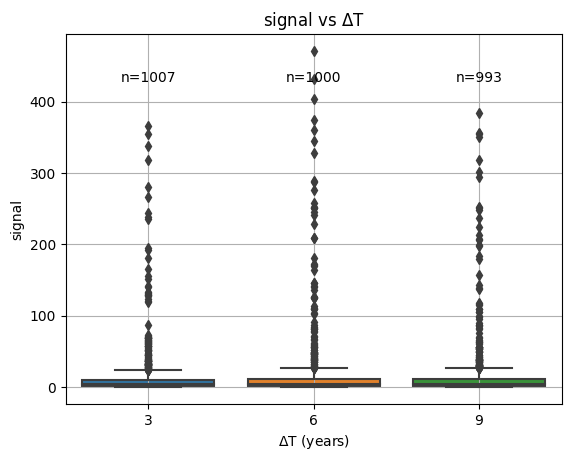

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

tgt = 'signal'
dff = df
# dff = df.loc[df['lc_change']==0]

sns.boxplot(x='year_change', y=tgt, data=dff)
# sns.violinplot(x='year_change', y='snr', data=df)
plt.xlabel('$\Delta$T (years)')
plt.ylabel(tgt)
plt.title(f'{tgt} vs $\Delta$T')
plt.grid(True)

group_counts = dff['year_change'].value_counts().sort_index()

for i, (x_val, count) in enumerate(group_counts.items()):
    plt.text(i, dff[tgt].max()*0.9, f'n={count}', 
             ha='center', va='bottom', fontsize=10)
    
plt.show()


## plot changes for different lc change

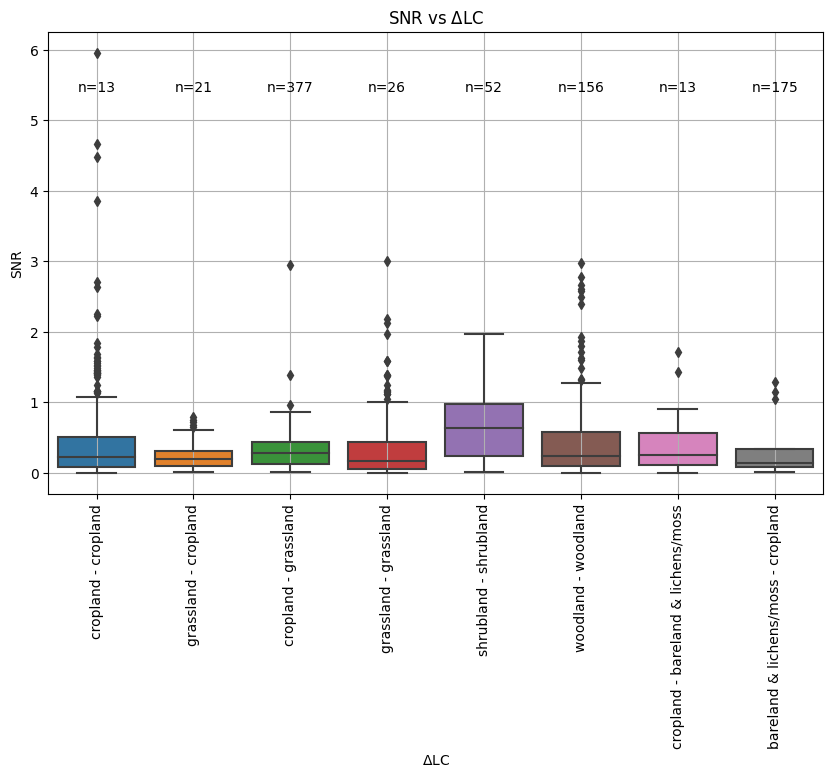

In [73]:
# only lc groups with more than 10 points
lc_counts = df['lc_level1'].value_counts() # count df
engh_lc = lc_counts[lc_counts>10].index # index here is the lc_level1 covers
fdf = df.loc[df['lc_level1'].isin(engh_lc)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='lc_level1', y='snr', data=fdf)
# sns.violinplot(x='year_change', y='snr', data=df)
plt.xlabel('$\Delta$LC')
plt.ylabel('SNR')
plt.title('SNR vs $\Delta$LC')
plt.xticks(rotation=90)

plt.grid(True)

group_counts = fdf['lc_level1'].value_counts().sort_index()

for i, (x_val, count) in enumerate(group_counts.items()):
    plt.text(i, df['snr'].max()*0.9, f'n={count}', 
             ha='center', va='bottom', fontsize=10)
    
plt.show()